In [32]:
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models')
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower')
import helper
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from librosa import note_to_hz as hz
from onset_detection import detected_samples
import librosa
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import helper
import numpy as np
from librosa import note_to_hz as hz
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [29]:
def detected_samples(path='/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/beethoven.wav', sample_length=2000, offset=500, show=False, delta=0.05, num_samples=None, normalise=True):
    """
    Returns an array of numpy arrays for each detected onset note
    """
    sample_rate, data = wav.read(path)
    data = data.astype(np.float64) 
    if num_samples is not None:
        data = data[:num_samples]
    onset_times = librosa.onset.onset_detect(
        y=data, post_avg=5, wait=1,  sr=sample_rate, units='time', delta=delta)  # delta=0.15, wait=5, pre_avg=0, post_avg=5, pre_max=5, post_max=10,
    onset_numbers = onset_times * sample_rate

    sample_data = []
    for i in range(len(onset_numbers)):
        sample = data[int(onset_numbers[i]+offset):int(onset_numbers[i] + offset + sample_length)]
        if normalise is True:
            sample = helper.power_normalise(sample)/20
        sample_data.append(sample)
    if show is True:
        print("here")
        audio_duration = len(data)/sample_rate
        time_samples = np.linspace(0, audio_duration, len(data))
        helper.plot_audio(time_samples, data)
        for time in onset_times:
            plt.vlines(time + offset/sample_rate, ymin=-
                       25000, ymax=25000, colors='blue', zorder=2,linewidths=1)
            # plt.vlines(time + offset/sample_rate + sample_length /
            #            sample_rate, ymin=-25000, ymax=25000, colors='pink', zorder=2, linewidths=1)
    return sample_data, sample_rate, onset_times+500/44100


here


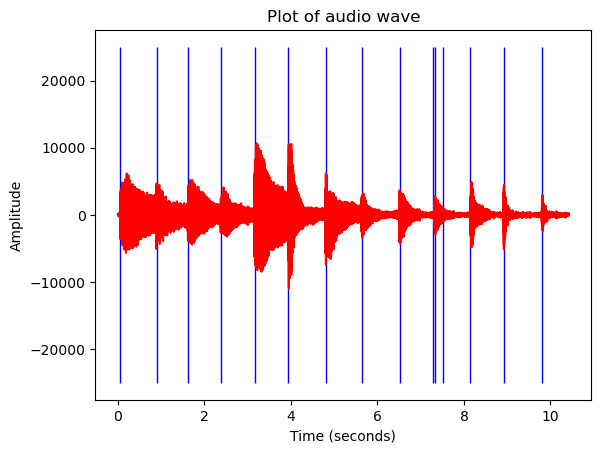

In [30]:
wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/round 2/circle_5ths.wav'
sample_rate, data = wav.read(wav_file)
# print(type(data))
sample_data, sample_rate, onset_times  = detected_samples(wav_file, sample_length=700, offset=0, show=True, delta=0.05,num_samples=1000000,normalise=False)
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))

In [5]:
indices_to_delete = [9, 11]  # List of indices to delete
sample_data = [element for index, element in enumerate(
    sample_data) if index not in indices_to_delete]
print(len(sample_data))


13


In [6]:
M=9
T=0.465
v=2.37
notes = ["A0", "E1", "B1", "F#2", "C#3", "G#3", "D#4", "A#4", "F5", "C6", "G6", "D7", "A7"]
sigma=1/500000



In [7]:
# Frequency calculation for circles of fifths starting from 27.5 Hz
f_base = 27.5
frequencies = [f_base * (2 ** (7/12)) ** i for i in range(len(sample_data))]

# Prepare to store the results
sigma_values = np.logspace(-8, 0, 50)  # M from 1 to 15
results = np.zeros((len(sigma_values), len(sample_data)))

# Compute LMLs for each combination of M and sample_data index
for i, sigma in enumerate(sigma_values):
    for j in range(len(sample_data)):
        results[i, j] = -helper.stable_nlml(time_samples, sample_data[j], M=M, sigma_f=sigma, normalised=True, f=[frequencies[j]], T=T, v=v)


In [10]:
print(len(frequencies))
print(frequencies)

13
[27.5, 41.20344461410874, 61.735412657015516, 92.49860567790861, 138.59131548843604, 207.65234878997256, 311.1269837220809, 466.1637615180899, 698.4564628660078, 1046.5022612023947, 1567.9817439269973, 2349.318143339261, 3520.000000000001]


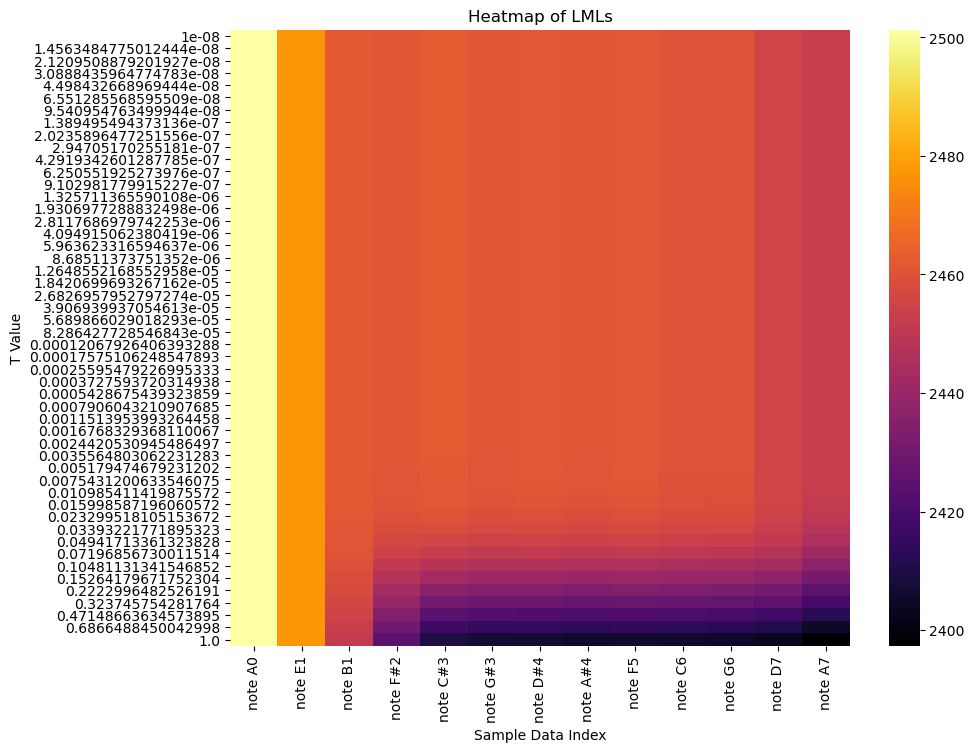

In [86]:


plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=False, cmap="viridis", xticklabels=[f"note {notes[i]}" for i in range(len(sample_data))], yticklabels=sigma_values)
plt.title("Heatmap of LMLs")
plt.xlabel("Sample Data Index")
plt.ylabel("T Value")
plt.show()

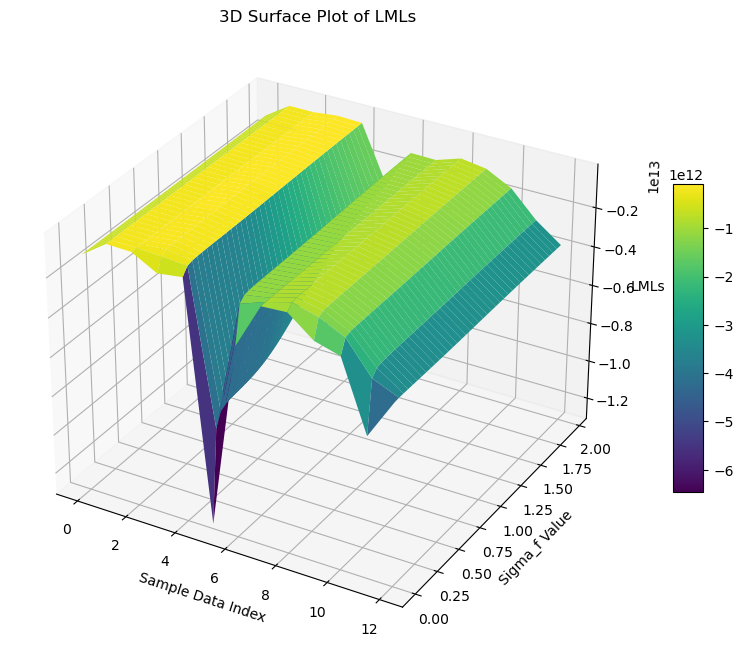

In [14]:

sample_data_indices = np.arange(len(sample_data))  # Indices of your sample data

# Create meshgrid
X, Y = np.meshgrid(sample_data_indices, sigma_values)

# Set up a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, results, cmap='viridis')

# Labels and title
ax.set_xlabel('Sample Data Index')
ax.set_ylabel('Sigma_f Value')
ax.set_zlabel('LMLs')
ax.set_title('3D Surface Plot of LMLs')

# Color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Show the plot
plt.show()

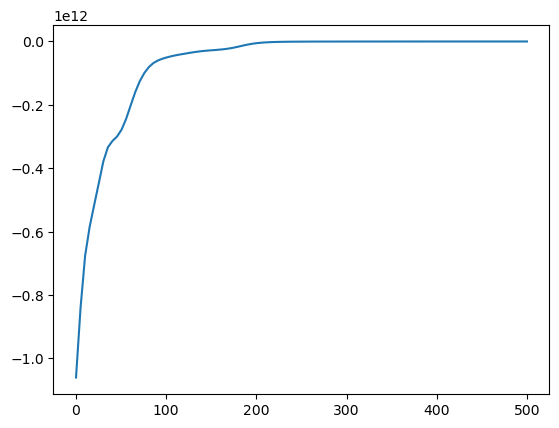

In [38]:
# Now looking at one frequency:
n = 0
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 500, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

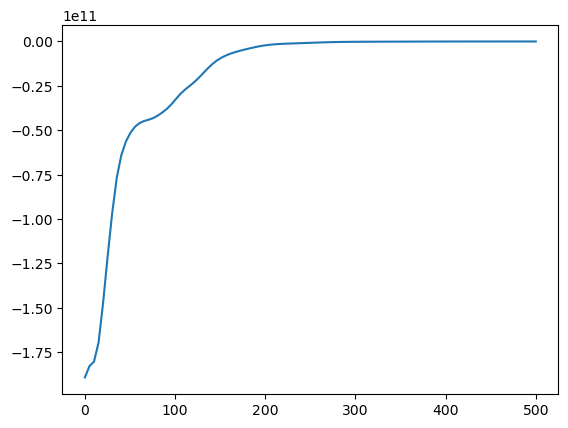

In [39]:
# Now looking at one frequency:
n = 1
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 500, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

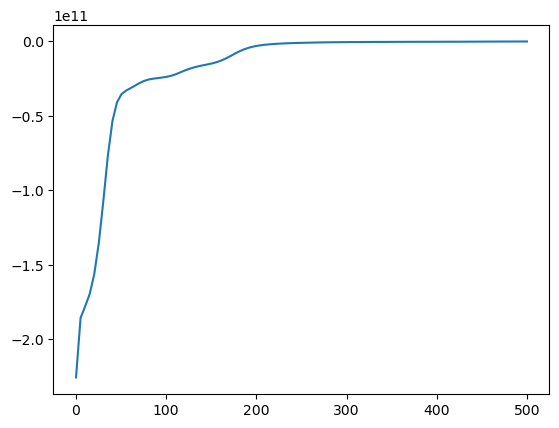

In [40]:
# Now looking at one frequency:
n = 2
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 500, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

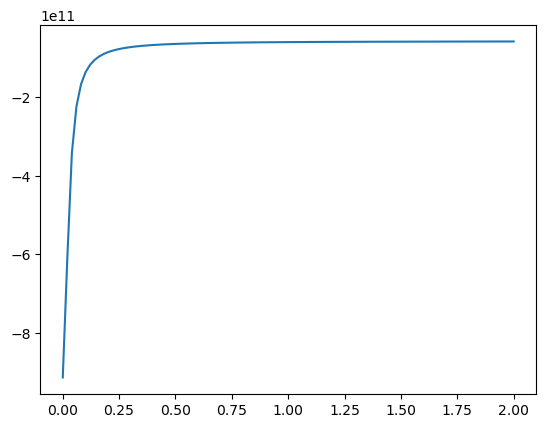

In [44]:
# Now looking at one frequency:
n = 3
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 2, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

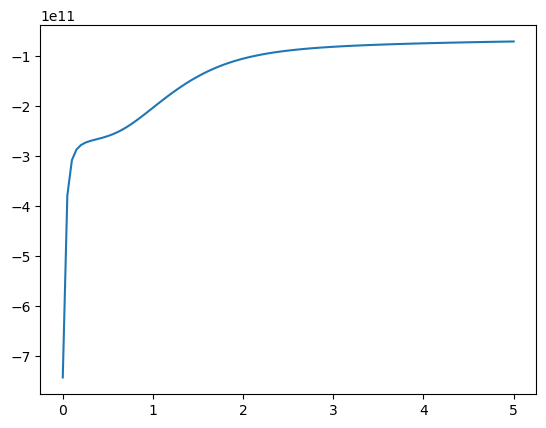

In [51]:
# Now looking at one frequency:
n = 4
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 5, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

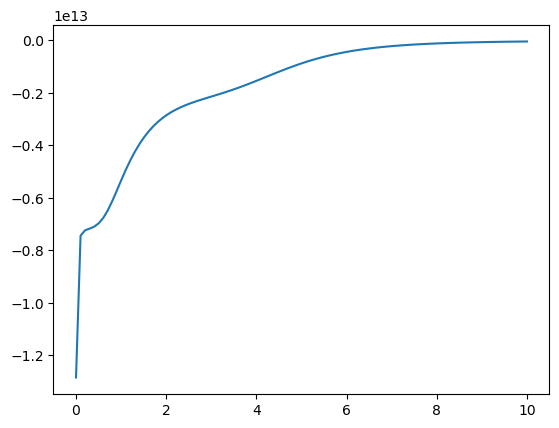

In [49]:
# Now looking at one frequency:
n = 5
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 10, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

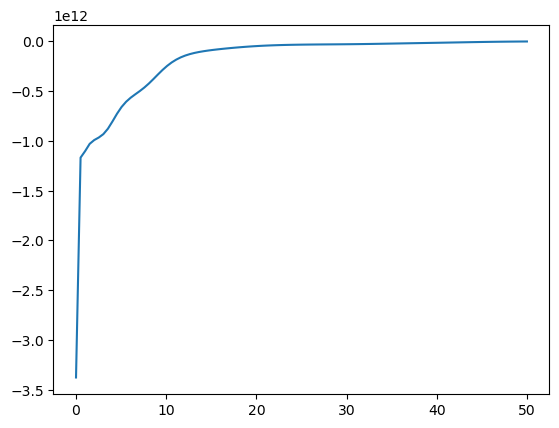

In [56]:
# Now looking at one frequency:
n = 6
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 50, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

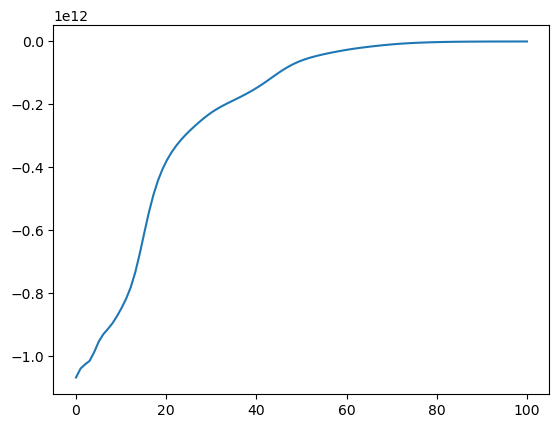

In [58]:
# Now looking at one frequency:
n = 7
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 100, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

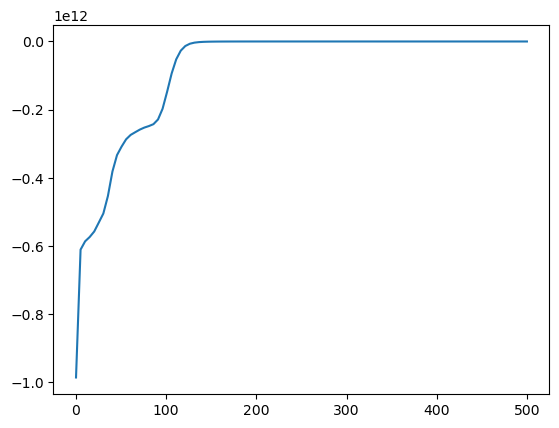

In [60]:
# Now looking at one frequency:
n = 8
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 500, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

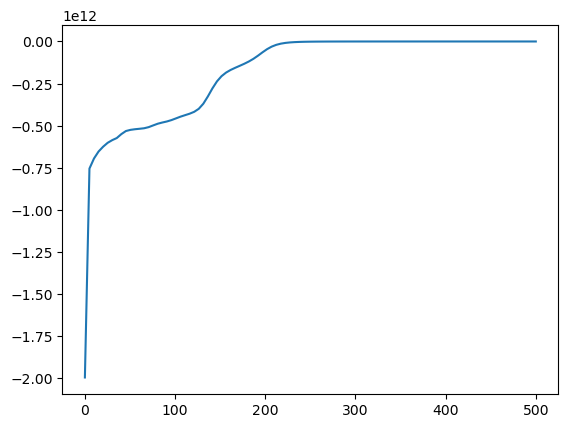

In [61]:
# Now looking at one frequency:
n = 9
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 500, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

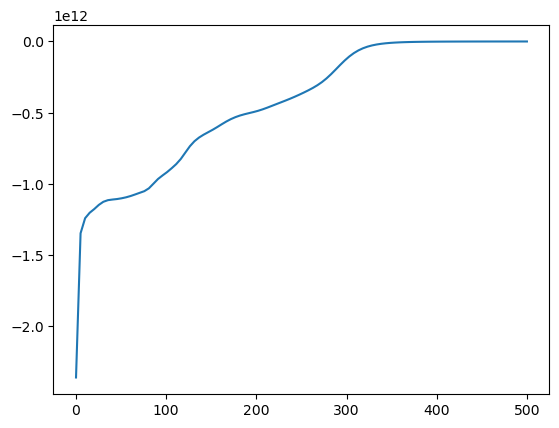

In [62]:
# Now looking at one frequency:
n = 10
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 500, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

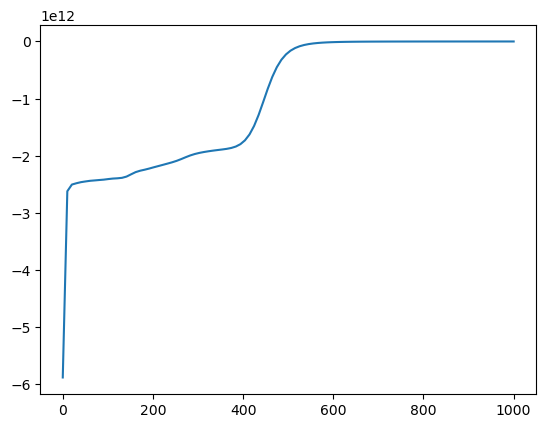

In [65]:
# Now looking at one frequency:
n = 11
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 1000, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

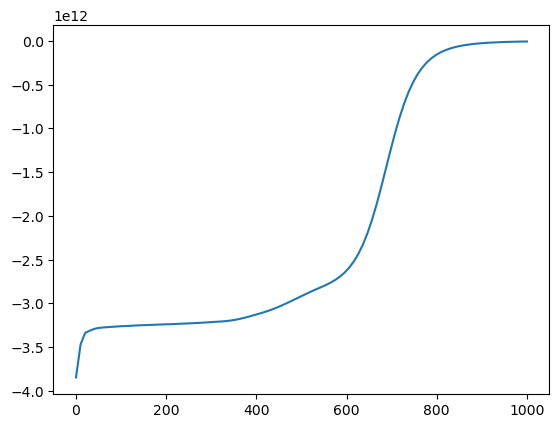

In [69]:
# Now looking at one frequency:
n = 12
data = sample_data[n]
LMLs = []
sigmas = np.linspace(0.0005, 1000, 100)
for sigma in sigmas:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=sigma, normalised=False, f=[frequencies[n]], T=T, v=v))

plt.plot( sigmas,LMLs)
plt.show()

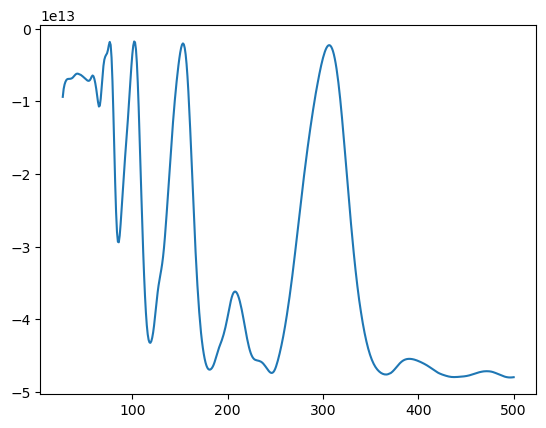

In [91]:
# Now looking at one frequency:
# small sigma

fs = np.linspace(27, 500, 500)
n = 6# 311 Hz
data = sample_data[n]
LMLs = []
for f in fs:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=1/500000, normalised=False, f=[f], T=T, v=v))

plt.plot( fs,LMLs)
plt.show()

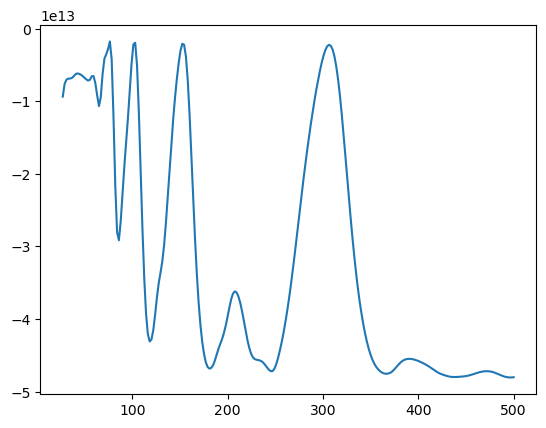

In [93]:
# Now looking at one frequency:
# big sigma

fs = np.linspace(27, 500, 250)
n = 6# 311 Hz
data = sample_data[n]
LMLs = []
for f in fs:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=M, sigma_f=1/500, normalised=False, f=[f], T=T, v=v))

plt.plot( fs,LMLs)
plt.show()

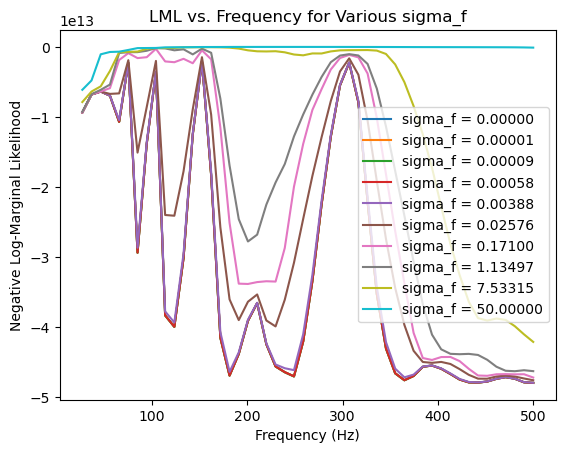

In [94]:
import numpy as np
import matplotlib.pyplot as plt

fs = np.linspace(27, 500, 50)
n = 6  # Presumed to be the index for 311 Hz in sample_data
data = sample_data[n]
sigma_f_values = np.logspace(np.log10(1/500000), np.log10(50), 10)  # Generates 10 values from 1/500000 to 50 on a logarithmic scale

# Assuming you have already defined 'time_samples', 'M', 'T', and 'v'
for sigma_f in sigma_f_values:
    LMLs = []
    for f in fs:
        LML = -helper.stable_nlml(time_samples, data, M=M, sigma_f=sigma_f, normalised=False, f=[f], T=T, v=v)
        LMLs.append(LML)
    plt.plot(fs, LMLs, label=f'sigma_f = {sigma_f:.5f}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Negative Log-Marginal Likelihood')
plt.title('LML vs. Frequency for Various sigma_f')
plt.legend()
plt.show()


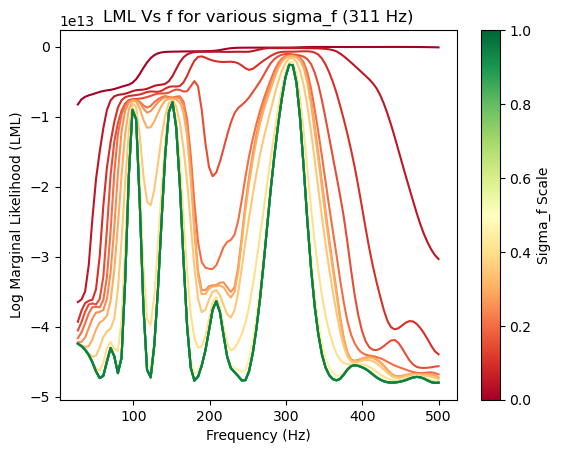

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

fs = np.linspace(27, 500, 100)
n = 6  # Presumed to be the index for 311 Hz in sample_data
data = sample_data[n]
sigma_f_values = np.logspace(np.log10(1/5000000), np.log10(50), 20)  # Generates 20 values from 1/500000 to 50 on a logarithmic scale

# Define colormap
cmap = get_cmap('RdYlGn')  # 'RdYlGn_r' is a red to green colormap, reversed to go from green to red

# Plot each line with color mapped to the sigma_f value
for i, sigma_f in enumerate(reversed(sigma_f_values)):
    LMLs = []
    for f in fs:
        LML = -helper.stable_nlml(time_samples, data, M=3, sigma_f=sigma_f, normalised=False, f=[f], T=T, v=v)
        LMLs.append(LML)
    color = cmap(i / len(sigma_f_values))  # Normalize index for color mapping
    plt.plot(fs, LMLs, color=color, label=f'sigma_f = {sigma_f:.5f}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Marginal Likelihood (LML)')
plt.title('LML Vs f for various sigma_f (311 Hz)')
# plt.legend(title='Sigma_f values', loc='upper right')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=plt.gca(), label='Sigma_f Scale')
plt.show()


In [100]:
plt.show()

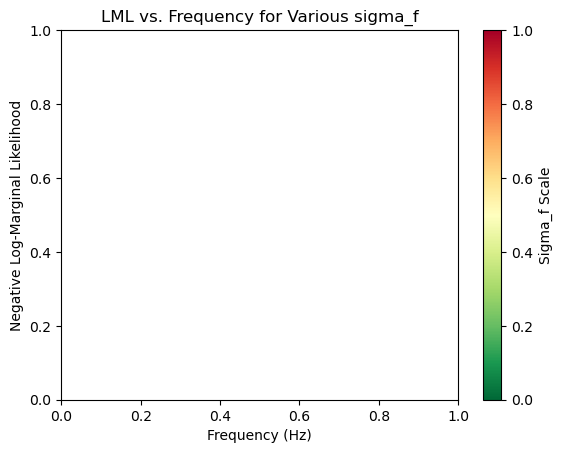

In [99]:
plt.xlabel('Frequency (Hz)')
plt.ylabel('Negative Log-Marginal Likelihood')
plt.title('LML vs. Frequency for Various sigma_f')
# plt.legend(title='Sigma_f values', loc='upper right')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=plt.gca(), label='Sigma_f Scale')
plt.show()

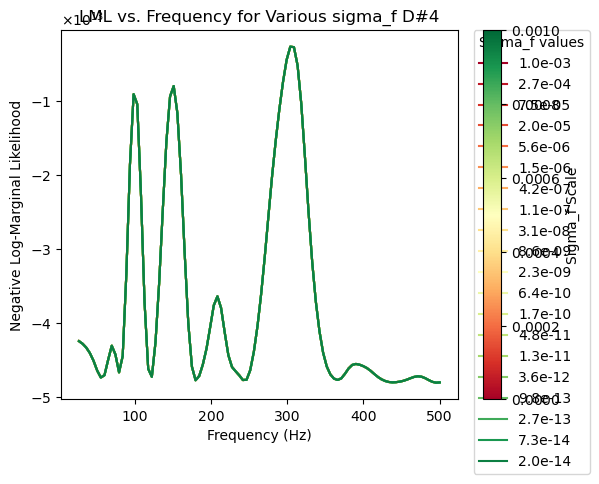

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import ScalarFormatter

fs = np.linspace(27, 500, 100)
n =  6 # Presumed to be the index for 311 Hz in sample_data
data = sample_data[n]
sigma_f_values = np.logspace(np.log10(1/50000000000000), np.log10(1/1000), 20)  # Generates 10 values from 1/500000 to 50 on a logarithmic scale

# Define colormap
cmap = get_cmap('RdYlGn')  # 'RdYlGn_r' is a red to green colormap, reversed to go from green to red

fig, ax = plt.subplots()

# Plot each line with color mapped to the sigma_f value
for i, sigma_f in enumerate(reversed(sigma_f_values)):
    LMLs = []
    for f in fs:
        LML = -helper.stable_nlml(time_samples, data, M=3, sigma_f=sigma_f, normalised=False, f=[f], T=T, v=v)
        LMLs.append(LML)
    color = cmap(i / len(sigma_f_values))  # Normalize index for color mapping
    ax.plot(fs, LMLs, color=color, label=f'{sigma_f:.1e}')  # Use scientific notation in the label

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Negative Log-Marginal Likelihood')
ax.set_title('LML vs. Frequency for Various sigma_f D#4')

# Create legend outside the plot area
leg = ax.legend(title='Sigma_f values', loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0)
leg._legend_box.align = "left"

# Format legend text to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1,1))
plt.gca().yaxis.set_major_formatter(formatter)

# Add colorbar and adjust its position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(sigma_f_values), vmax=max(sigma_f_values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Sigma_f Scale')
cbar.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Ensure the colorbar ticks are in scientific notation

plt.show()


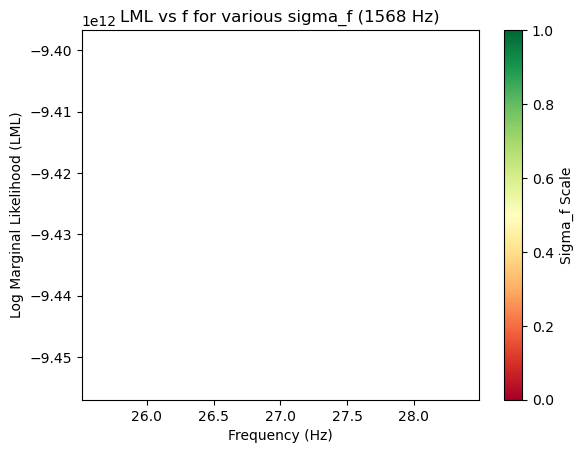

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

fs = np.linspace(27, 1700, 1)
n = 10  # Presumed to be the G6? 1567Hz
data = sample_data[n]
sigma_f_values = np.logspace(np.log10(1/500000), np.log10(50), 20)  # Generates 10 values from 1/500000 to 50 on a logarithmic scale

# Define colormap
cmap = get_cmap('RdYlGn')  # 'RdYlGn_r' is a red to green colormap, reversed to go from green to red

# Plot each line with color mapped to the sigma_f value
for i, sigma_f in enumerate(reversed(sigma_f_values)):
    LMLs = []
    for f in fs:
        LML = -helper.stable_nlml(time_samples, data, M=7, sigma_f=sigma_f, normalised=False, f=[f], T=T, v=v)
        LMLs.append(LML)
    color = cmap(i / len(sigma_f_values))  # Normalize index for color mapping
    plt.plot(fs, LMLs, color=color, label=f'sigma_f = {sigma_f:.5f}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Marginal Likelihood (LML)')
plt.title('LML vs f for various sigma_f (1568 Hz)')
# plt.legend(title='Sigma_f values', loc='upper right')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=plt.gca(), label='Sigma_f Scale')
plt.show()


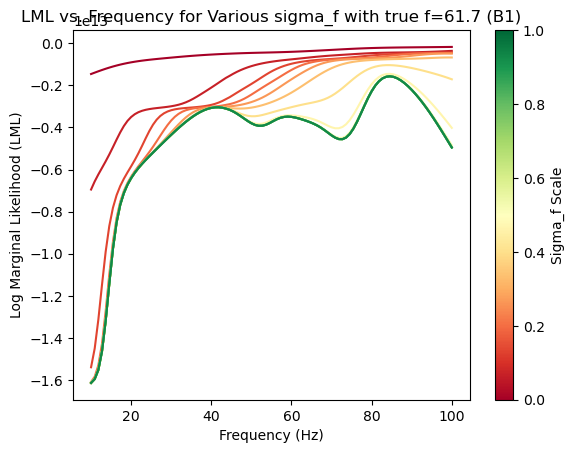

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

fs = np.linspace(10, 100, 100)
n = 2  # Presumed to be the index for 311 Hz in sample_data
data = sample_data[n]
sigma_f_values = np.logspace(np.log10(1/500000), np.log10(50), 15)  # Generates 10 values from 1/500000 to 50 on a logarithmic scale

# Define colormap
cmap = get_cmap('RdYlGn')  # 'RdYlGn_r' is a red to green colormap, reversed to go from green to red

# Plot each line with color mapped to the sigma_f value
for i, sigma_f in enumerate(reversed(sigma_f_values)):
    LMLs = []
    for f in fs:
        LML = -helper.stable_nlml(time_samples, data, M=4, sigma_f=sigma_f, normalised=False, f=[f], T=T, v=v)
        LMLs.append(LML)
    color = cmap(i / len(sigma_f_values))  # Normalize index for color mapping
    plt.plot(fs, LMLs, color=color, label=f'sigma_f = {sigma_f:.5f}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Marginal Likelihood (LML)')
plt.title('LML vs. Frequency for Various sigma_f with true f=61.7 (B1)')
# plt.legend(title='Sigma_f values', loc='upper right')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=plt.gca(), label='Sigma_f Scale')
plt.show()
